# Проект: Статистический анализ данных

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 88 рублей;
  - стоимость старта (начала поездки) — 5050 рублей;
- с подпиской Ultra
  - абонентская плата — 199199 рублей в месяц;
  - стоимость одной минуты поездки — 66 рублей;
  - стоимость старта — бесплатно.
 
В основных данных есть информация о пользователях, их поездках и подписках.

**Цели проекта:** 
- Провести анализ о пользователях и их поездках
- Выявить какие есть проблемы, решить их и получить достоверные данные
- Проверить какие гипотезы помогут бизнесу стать лучше

**Задачи исследования:**
- Провести предобработку данных
- Провести исследовательский анализ данных
- Объединить данные
- Подсёт выручки
- Выполнить статистический анализ данных

**План работы:**
1) Изучим общую информацию о пользователях и их поездаках методами info(), head(), hist().
2) Приведём столбец date к типу даты pandas.
3) Создадим новый столбец с номером месяца на основе столбца date.
4) Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаим их, если такие значения присутствуют.
5) Опишим и визуализируем общую информацию о пользователях и поездках:
    - частота встречаемости городов;
    - соотношение пользователей с подпиской и без подписки;
    - возраст пользователей;
    - расстояние, которое пользователь преодолел за одну поездку;
    - продолжительность поездок.
6) Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().
7) Создадим ещё два датафрейма:
   - c данными о пользователях без подписки;
   - с данными о пользователях с подпиской.
8) Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.
9) Создадим датафрейм с агрегированными данными о поездках :
    - найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц?
10) Проверим гипотезы:
    - Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
    - Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
    - Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
    - Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?
11) Подвёдем итоги проекта


In [100]:
#Подключаем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
from scipy.stats import binom, norm
from math import sqrt

## 1 Загрузка данных

In [48]:
try:
    data_users_go = pd.read_csv('users_go.csv')
    data_rides_go = pd.read_csv('rides_go.csv', parse_dates=['date'])
    data_subscriptions_go = pd.read_csv('subscriptions_go.csv')
except:
    data_users_go = pd.read_csv('/datasets/users_go.csv')
    data_rides_go = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])
    data_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

In [50]:
#Посмотрим общую информацию данных методами head() и info()
display(data_users_go.head())
display(data_users_go.info())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

In [52]:
display(data_rides_go.head())
display(data_rides_go.info())

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

In [54]:
display(data_subscriptions_go.head())
display(data_subscriptions_go.info())

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None

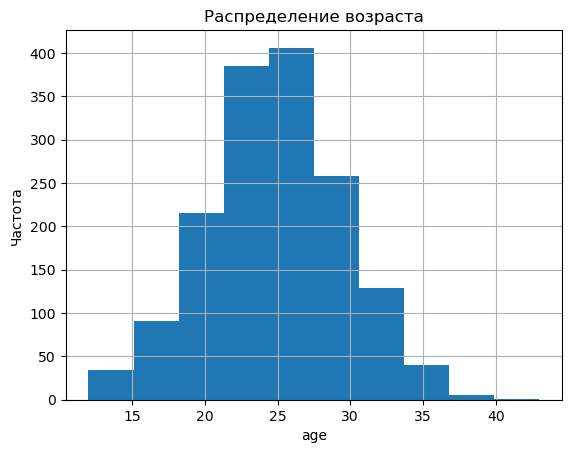

In [56]:
data_users_go['age'].hist()
plt.title('Распределение возраста')
plt.ylabel('Частота')
plt.xlabel('age')
plt.show()

In [58]:
data_users_go[['age']].describe()

,age
count,1565.000000
mean,24.922045
std,4.553496
min,12.000000
25%,22.000000
50%,25.000000
75%,28.000000
max,43.000000


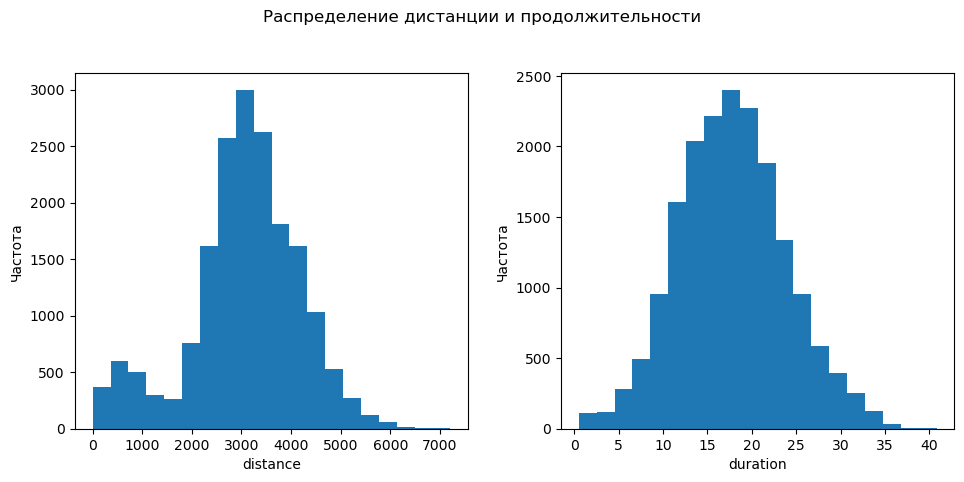

In [60]:
# гистограммы для всех числовых столбцов
fig = plt.figure(figsize=(10,5))
fig.suptitle('Распределение дистанции и продолжительности')
num_columns = data_rides_go.drop(columns = ['user_id', 'date']).columns

for i in range(len(num_columns)):
    fig.add_subplot(1, 2, i+1)
    plt.hist(data_rides_go[num_columns[i]], bins = 20)
    plt.ylabel('Частота')
    plt.xlabel(f"{num_columns[i]}")
    plt.tight_layout(pad = 2)

In [61]:
data_rides_go[['distance', 'duration']].describe()

,distance,duration
count,18068.000000,18068.000000
mean,3070.659976,17.805011
std,1116.831209,6.091051
min,0.855683,0.500000
25%,2543.226360,13.597563
50%,3133.609994,17.678395
75%,3776.222735,21.724800
max,7211.007745,40.823963


В данных не замечена аномальных значений, пропусков не обнаружено, названия столбцов выглядят корректно, тип данных в порядке.

## 2  Предобработка данных

In [65]:
#Добавим новый столбец 'month' для отображения какой месяц
data_rides_go['month'] = pd.DatetimeIndex(data_rides_go['date']).month

In [67]:
data_rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [69]:
#Определим кол-во пропусков методами isna() и sum()
data_users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [71]:
data_rides_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [73]:
data_subscriptions_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропуски не обнаружены.

In [76]:
#Определим кол-во дубликатов методами duplicated() и sum()
data_users_go.duplicated().sum()

31

In [78]:
data_rides_go.duplicated().sum()

0

In [80]:
data_subscriptions_go.duplicated().sum()

0

Есть 31 дубликат, их достачно мало, можно просто удалить.

In [83]:
#Удалим дубликаты методом drop_duplicates(), нумирацию индексов восстановим методом reset_index(drop = True)
data_users_go = data_users_go.drop_duplicates().reset_index(drop = True)

In [85]:
data_users_go.duplicated().sum()

0

Явные дубликаты удалены. Проверим неявные дубликаты.

In [19]:
#Методом unique() найдем уникальные значения
data_users_go['name'].sort_values().unique()

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

In [20]:
data_users_go['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

In [21]:
data_users_go['subscription_type'].sort_values().unique()

array(['free', 'ultra'], dtype=object)

In [22]:
#Проверим нет ли одинанковых id с разным написанием имени "Наташа"
data_users_go.loc[(data_users_go['name'] == 'Наталья') | (data_users_go['name'] == 'Наташа')]

,user_id,name,age,city,subscription_type
326,327,Наташа,24,Краснодар,ultra
356,357,Наталья,30,Сочи,ultra
417,418,Наташа,26,Краснодар,ultra
480,481,Наташа,24,Тюмень,ultra
659,660,Наташа,26,Омск,ultra
809,810,Наталья,24,Ростов-на-Дону,free
885,886,Наташа,22,Тюмень,free
952,953,Наташа,26,Ростов-на-Дону,free
985,986,Наташа,30,Екатеринбург,free
1023,1024,Наташа,21,Москва,free


Встречаются неявные дубликаты в столбце `name` в виде "Наталья" "Наташа", но на результаты исследования проекта это никак не повлияет, оставим как есть.

В итоге получили, что пропусков нет, дубликаты удалены.

## 3 Исследовательский анализ данных

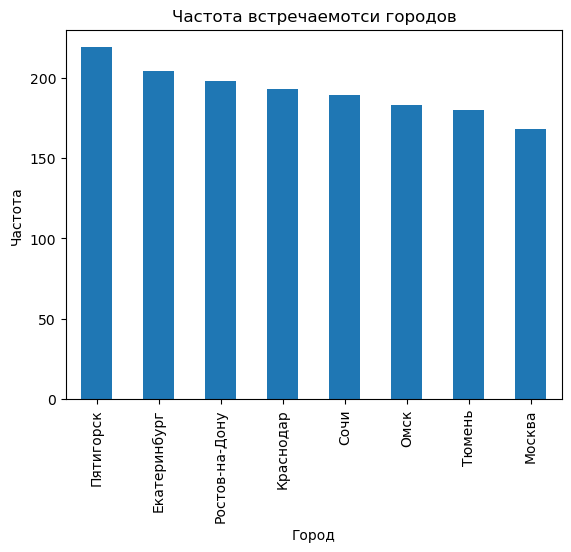

In [88]:
#Наглядно оценим частоту встречаемотси городов методом value_counts() и plot()
data_users_go['city'].value_counts().plot(kind = 'bar', title = 'Частота встречаемотси городов', xlabel = 'Город', ylabel = 'Частота')
plt.show()

В основном пользуются услугами аренды самокатов в Пятигорске, меньше всего в Москве.

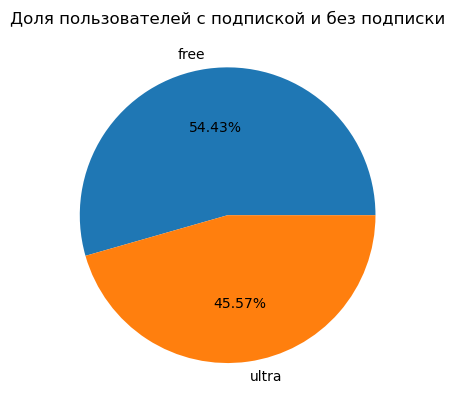

In [90]:
#Наглядно оценим соотношение пользователей с подписикой и без подписки методом value_counts() и plot()
plt.pie(data_users_go['subscription_type'].value_counts(), labels = data_users_go['subscription_type'].value_counts().index, autopct='%1.2f%%')
plt.title('Доля пользователей с подпиской и без подписки')
plt.show()

Большая часть(54%) пользователей не имеют подписку.

In [155]:
# создадим функцию для построения гистрограммы и диаграммы размаха
def build_hist_boxplot(df, name_column, title, xlabel):
    fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True, gridspec_kw=dict(height_ratios=[4,1]))
    sns.histplot(data=df, x=name_column, discrete=True,
             kde=True, ax=ax[0], bins = 15)\
    .set(title=title,
     ylabel='Количество повторений')
    sns.boxplot(data=df, x=name_column, ax=ax[1])\
    .set(xlabel=xlabel);

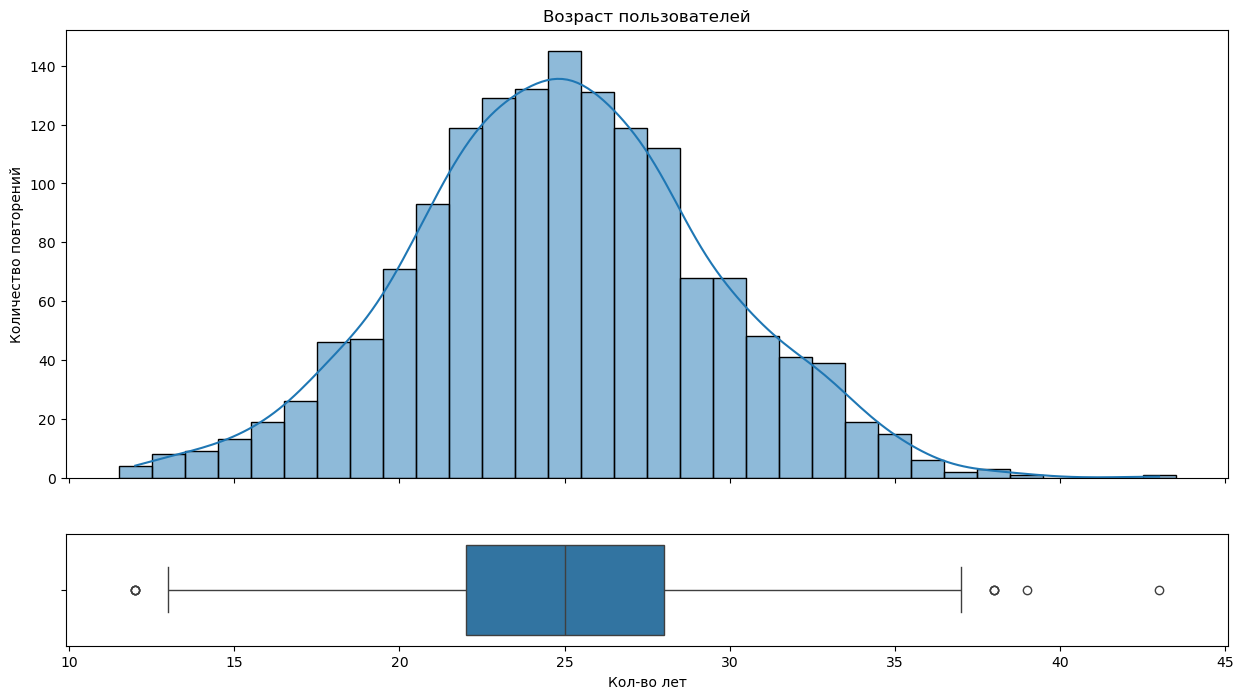

In [157]:
build_hist_boxplot(data_users_go, 'age', 'Возраст пользователей', 'Кол-во лет')

In [159]:
data_users_go[['age']].describe()

,age
count,1534.000000
mean,24.903520
std,4.572367
min,12.000000
25%,22.000000
50%,25.000000
75%,28.000000
max,43.000000


Самый часто встречаемый возраст 25 лет, минимальный возраст 12 лет, максимальный 43 года. Данные выглядят правдоподобно.

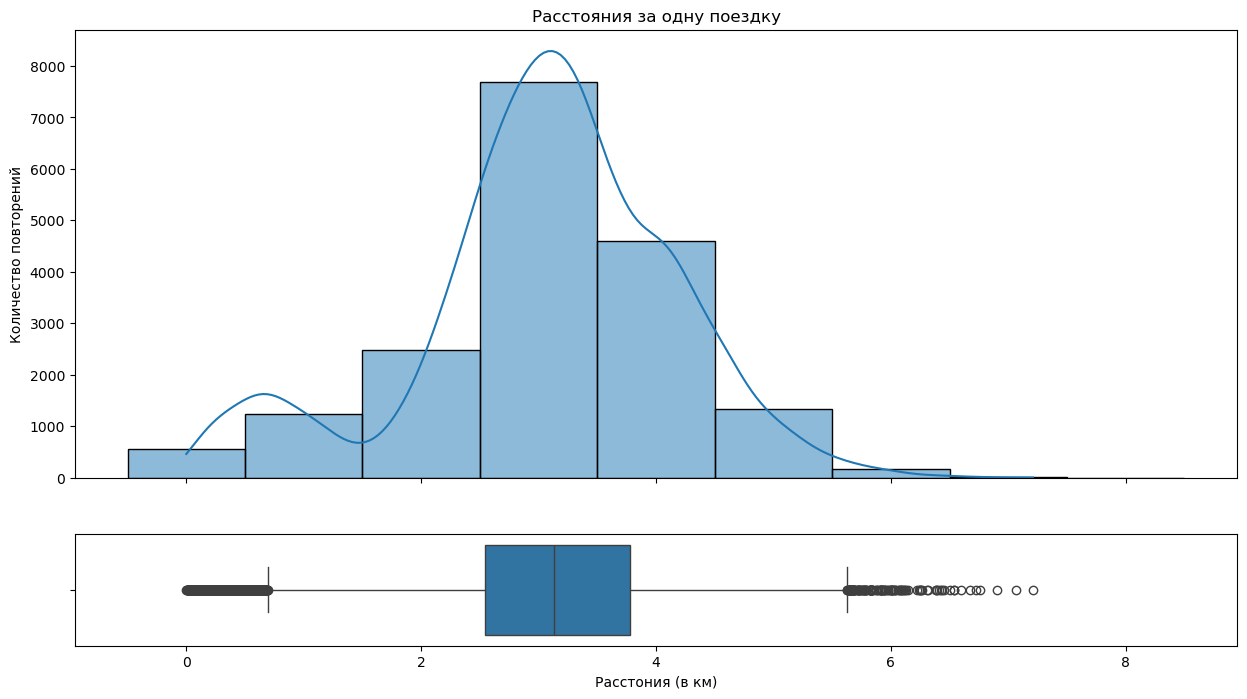

In [162]:
build_hist_boxplot(data_rides_go[['distance']]/1000, 'distance', 'Расстояния за одну поездку', 'Расстония (в км)')

In [163]:
data_rides_go[['distance']].describe()

,distance
count,18068.000000
mean,3070.659976
std,1116.831209
min,0.855683
25%,2543.226360
50%,3133.609994
75%,3776.222735
max,7211.007745


В основном расстояние за поездку в пределах 3100- 3200 метров. 

Минимальные растояния до 10 метров вполне возможны, так как самокат могут взять по ошибке, и тут же отменить заказ.

Расстояния больше 6000 метров также возможноны, заряда может хватить и на гораздо больший километраж.

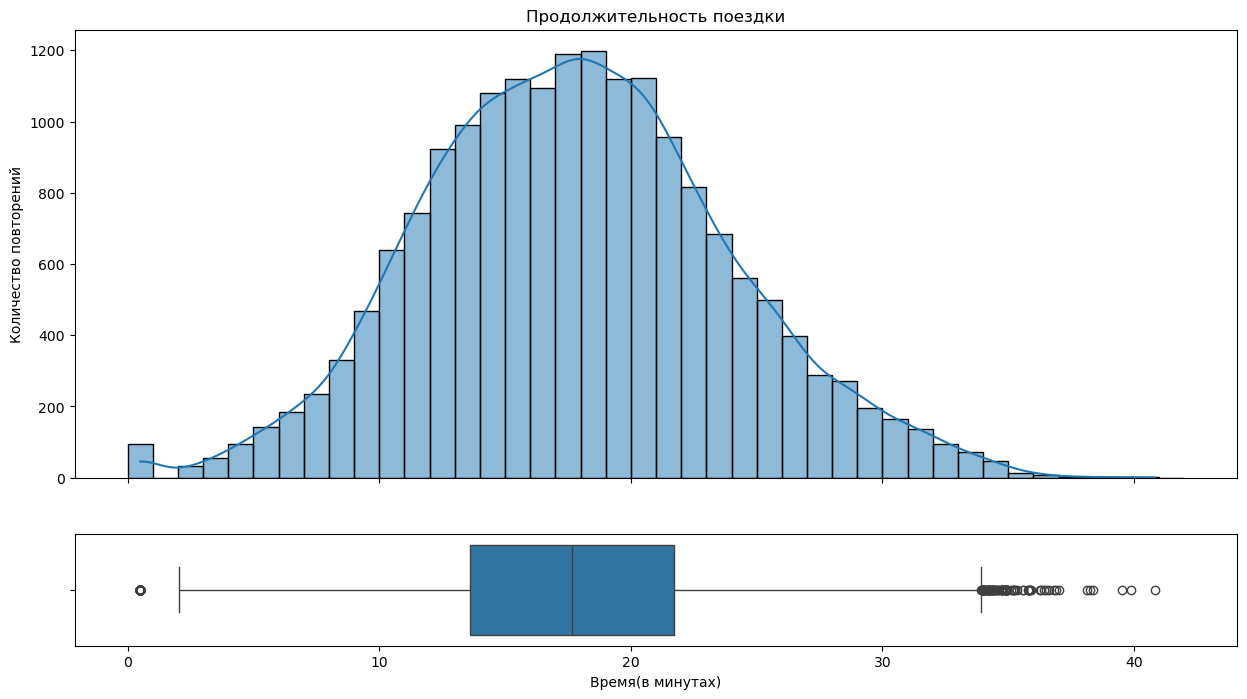

In [167]:
build_hist_boxplot(data_rides_go, 'duration', 'Продолжительность поездки', 'Время(в минутах)')

In [168]:
data_rides_go[['duration']].describe()

,duration
count,18068.000000
mean,17.805011
std,6.091051
min,0.500000
25%,13.597563
50%,17.678395
75%,21.724800
max,40.823963


В освном на 1 поездку уходит от 14 до 21 минут. 

Поездки меньше 1 минуты вполне возможны либо пользователей отменил заказ сразу же.

Поездки свыше 25 минут также реальны.

## 4 Объединение данных

In [173]:
#Объединим данные о поездках и пользователях в единую таблицу методом merge()
data_users_rides = data_rides_go.merge(data_users_go, on = 'user_id', how = 'outer')

In [175]:
#Добавим данные о подписке в таблицу data_users_rides
data = data_users_rides.merge(data_subscriptions_go, on = 'subscription_type', how = 'outer')
data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


В итоге получили общую таблицу `data` с инорфацией о подписках, поездка и пользователях.


In [178]:
#После объединения могли получиться пропуски проверим их кол-во
data.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков нет.

In [181]:
#Создадим два датафрейма с платной и бесплатной подпиской
data_free = data.query('subscription_type == "free"').reset_index()
data_ultra = data.query('subscription_type == "ultra"').reset_index()
display(data_free.head())
display(data_ultra.head())

,index,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,0,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,1,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,2,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,3,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,4,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


,index,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,11568,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,11569,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,11570,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,11571,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,11572,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


## 5 Подсчёт выручки

In [184]:
#Методом np.ceil() округлим суммарное время до целого числа
data['duration'] = np.ceil(data['duration'])

In [186]:
data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,700,2515.690719,15.0,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,700,846.932642,17.0,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,700,4004.434142,21.0,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,700,1205.911290,10.0,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,700,3047.379435,18.0,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [188]:
#Создами сводную таблицу методом pivot_table.
#В ней отобразим суммарное расстояние, суммарное время и кол-во поездок за каждый месяц.
#Методом reset_index() восстановим нормальную нумерацию строк
data_revenue_calculation = data.pivot_table(index = ['user_id', 'month', 'minute_price', 'start_ride_price', 'subscription_type', 'subscription_fee'], 
                                            aggfunc = ({'distance':'sum', 'duration':'sum', 'date':'count'})).reset_index()

In [190]:
#Для удобства переименуем столбец date на count_trips(кол-во поездок за месяц)
data_revenue_calculation = data_revenue_calculation.rename(columns = {'date':'count_trips'})
data_revenue_calculation.head()

,user_id,month,minute_price,start_ride_price,subscription_type,subscription_fee,count_trips,distance,duration
0,1,1,6,0,ultra,199,2,7027.511294,42.0
1,1,4,6,0,ultra,199,1,754.159807,7.0
2,1,8,6,0,ultra,199,2,6723.470560,46.0
3,1,10,6,0,ultra,199,2,5809.911100,32.0
4,1,11,6,0,ultra,199,3,7003.499363,56.0


Помесячную выручку посчитаем как: 

стоимость старта поездки * кол-во поездок + стои-ть одной минуты поездки * общая продол-ть всех поездок в минутах + стоимость подписки

In [193]:
#Добавим столбец с помесячной выручкой 
data_revenue_calculation['profit'] = (data_revenue_calculation['start_ride_price'] * data_revenue_calculation['count_trips']) + \
(data_revenue_calculation['minute_price'] * data_revenue_calculation['duration']) + \
 data_revenue_calculation['subscription_fee']

In [199]:
data_revenue_calculation.head()

,user_id,month,minute_price,start_ride_price,subscription_type,subscription_fee,count_trips,distance,duration,profit
0,1,1,6,0,ultra,199,2,7027.511294,42.0,451.0
1,1,4,6,0,ultra,199,1,754.159807,7.0,241.0
2,1,8,6,0,ultra,199,2,6723.470560,46.0,475.0
3,1,10,6,0,ultra,199,2,5809.911100,32.0,391.0
4,1,11,6,0,ultra,199,3,7003.499363,56.0,535.0


In [201]:
total_expenses = data_revenue_calculation.pivot_table(index = 'user_id', values = 'profit', aggfunc = 'sum')

In [151]:
total_expenses.head()

,profit
user_id,
1,2421.629452
2,2578.865675
3,2792.161081
4,2925.381486
5,2636.443594


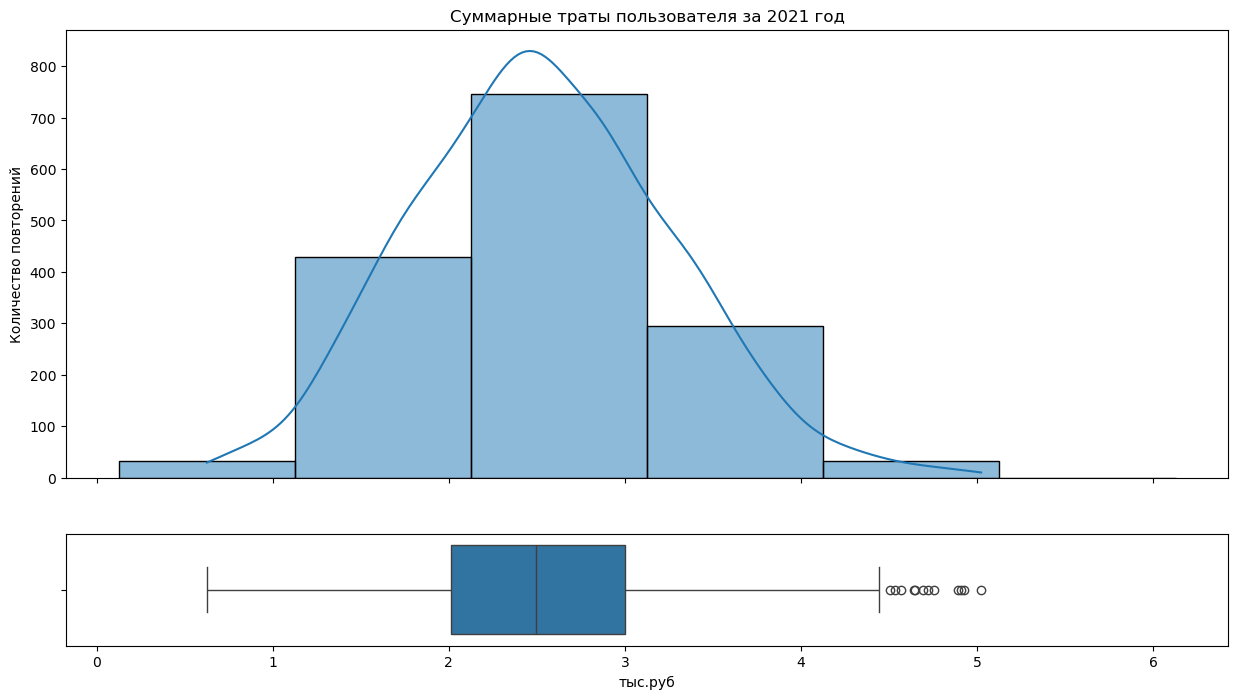

In [207]:
build_hist_boxplot(total_expenses/1000, 'profit', 'Суммарные траты пользователя за 2021 год', 'тыс.руб')

In [209]:
total_expenses.describe()

,profit
count,1534.000000
mean,2528.449153
std,740.607283
min,626.000000
25%,2012.500000
50%,2497.000000
75%,3003.000000
max,5022.000000


Чаще всего за 2021 год пользователь суммарно отдавал примерно 2500 - 2900 рублей.

,profit
count,12.000000
mean,323220.083333
std,13849.383731
min,290428.000000
25%,321027.000000
50%,325875.500000
75%,331361.000000
max,337958.000000


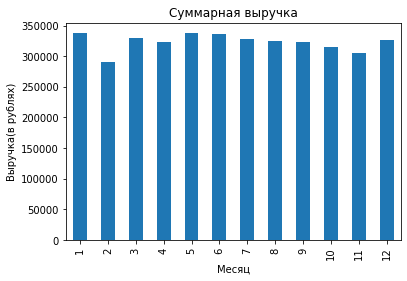

In [43]:
#Оценим как распеределяется выручка по месяцам
data_revenue_calculation.pivot_table(index = 'month', values = 'profit', aggfunc = 'sum').plot(kind = 'bar', title = 'Суммарная выручка', legend = False,
                                                                                              xlabel = 'Месяц', ylabel = 'Выручка(в рублях)')
data_revenue_calculation.pivot_table(index = 'month', values = 'profit', aggfunc = 'sum').describe()

Меньше всего получилось заработать в февраля месяце. Хотя в январе была достигнута маскимальная выручка.

## 6 Проверк гипотез

### 6.1 

Нужно проверить гипотезу: тратят ли пользователи с подпиской больше времени на поездки?

Нулевая гипотеза: средние время поездки двух категорий пользователей равны

Альтернативная гипотеза: Пользователи с подпсисокй тратят больше времени на поездки чем пользователи без подписки

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


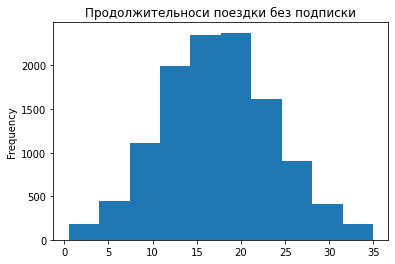

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


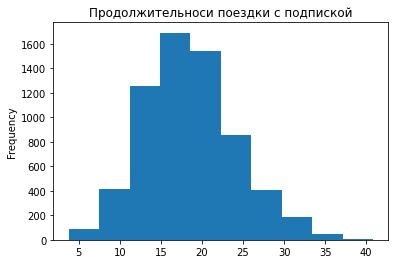

In [44]:
data_free['duration'].plot(kind = 'hist', title = 'Продолжительноси поездки без подписки', xlabel = 'время(в минутах)')
print(data_free['duration'].describe())
plt.show()
data_ultra['duration'].plot(kind = 'hist', title = 'Продолжительноси поездки с подпиской', xlabel = 'время(в минутах)')
print(data_ultra['duration'].describe())
plt.show()

In [45]:
alpha = 0.05 # уровень статистической значимости

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Нулевую гипотезу отвергаем, так как есть основания, что пользватели с подпсиской тратят больше времени на поездки, соотвественно они будет более выгодны для компании.

### 6.2

Нулевая гипотеза: Среднее расстояние которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров.

Альтернативная гипотеза: Среднее расстояние за 1 поездку больше 3130 метров.

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

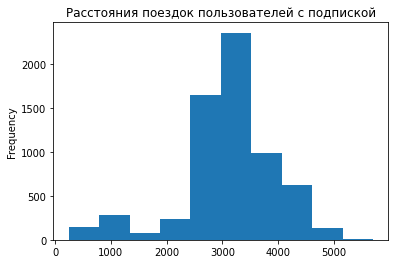

In [46]:
#Наглядно оценим какие расстояния пользователи с платной подпиской совершают за 1 поездку
data_ultra['distance'].plot(kind = 'hist', title = 'Расстояния поездок пользователей с подпиской', xlabel = 'Кол-во метров', ylabel = 'Частота')
data_ultra['distance'].describe()

In [47]:
interested_value = 3130# оптимальнре расстояние для износа самоката
alpha = 0.05# уровень статистической значимости

#Используем ttest_1samp с односторонним вправо
results = st.ttest_1samp(data_ultra['distance'], interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Расстоние превышает 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: расстояние за 1 поездку удовлетворяет оптимальному')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: расстояние за 1 поездку удовлетворяет оптимальному


Нулевую гипотезу не отвергаем, пользователи с платной подпиской преодолевают оптимальные расстояния для самоката.

### 6.3

Нулевая гипотеза: Помесячная выручка от пользователей с подпиской и без подписки равна

Альтернативная гипотеза: Помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки.

In [48]:
#Создадим переменную data_pofit в который сохраним таблицу с помесячной выручкой для разного типа подписки
data_profit = data_revenue_calculation.pivot_table(index = 'month', columns = 'subscription_type', values = 'profit', aggfunc = 'sum').reset_index()
data_profit

subscription_type,month,free,ultra
0,1,193850.0,144108.0
1,2,165856.0,124572.0
2,3,187214.0,142608.0
3,4,185598.0,137318.0
4,5,188030.0,149235.0
5,6,192144.0,143834.0
6,7,185038.0,143466.0
7,8,187116.0,138534.0
8,9,193700.0,129337.0
9,10,181428.0,133932.0


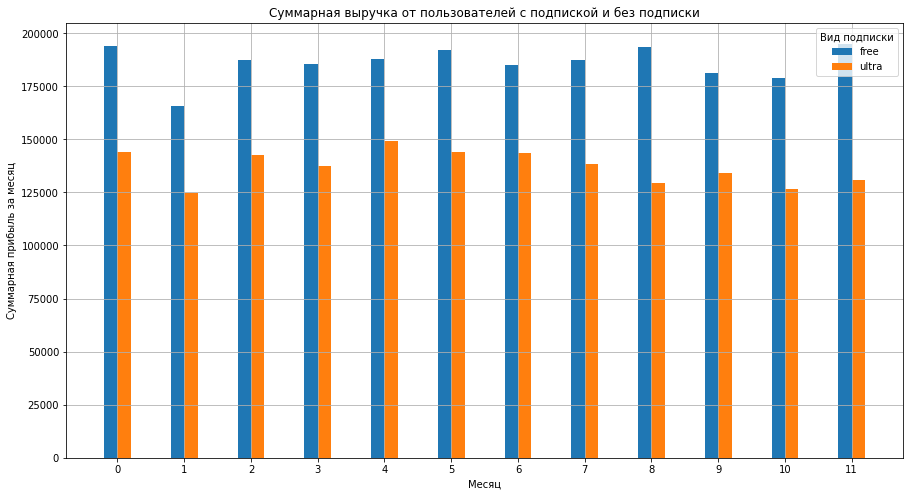

In [49]:
#С помощию библиотеки matplotlib создам столбчатые диаграмм, где покажем помесячную выручку пользователей с подпиской и без
fig, ax = plt.subplots(figsize=(15, 8)) #  одна строка вместо двух:
                                        #  fig = plt.figure()
                                        #  ax = fig.add_subplot()

# Получаем кол-во месяцев и ширину каждого столбца
num_stores = len(data_profit.index)
bar_width = 0.2

# Создаем массив индексов по месяцам(1,2,3....12)
index = np.arange(num_stores)
# Построение гистограммы для разных подписок
for i, product in [(0 ,'free'), (1, 'ultra')]:
    ax.bar(index + i* bar_width, data_profit[product], bar_width, label=product)

ax.set_xlabel('Месяц')
ax.set_ylabel('Суммарная прибыль за месяц')
ax.set_title('Суммарная выручка от пользователей с подпиской и без подписки')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(data_profit.index)
ax.legend(title='Вид подписки') # добавляем легенду
ax.grid(True)
plt.show()


Помесячная выручка от пользователей без подписки всегда выше, чем у пользователей с подпиской.

Так как пользователей без подписки гораздо больше, соответсвенно, прибыль выше. 

Нужно смотреть сколько в среднем выручка от одного пользователя с подпиской и без.

count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
25%       301.000000
50%       337.000000
75%       409.000000
max       955.000000
Name: profit, dtype: float64


<AxesSubplot:title={'center':'Траты пользователей с подпиской'}, ylabel='Frequency'>

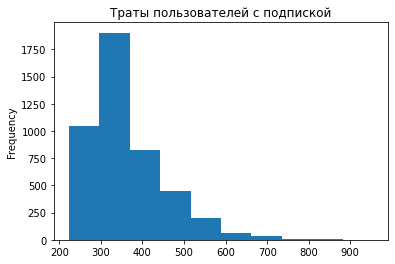

In [50]:
print(data_revenue_calculation.query('subscription_type == "ultra"')['profit'].describe())
data_revenue_calculation.query('subscription_type == "ultra"')['profit'].plot(kind = 'hist', title = 'Траты пользователей с подпиской',
                                                                             xlabel = 'Кол-во рублей', ylabel = 'Частота')

count    6798.000000
mean      328.641365
std       183.868330
min        58.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: profit, dtype: float64


<AxesSubplot:title={'center':'Траты пользователей без подписки'}, ylabel='Frequency'>

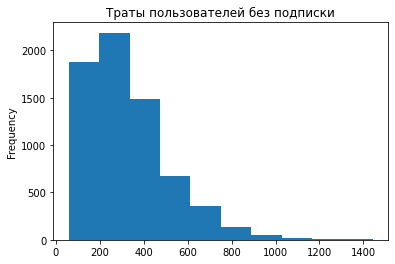

In [51]:
print(data_revenue_calculation.query('subscription_type == "free"')['profit'].describe())
data_revenue_calculation.query('subscription_type == "free"')['profit'].plot(kind = 'hist', title = 'Траты пользователей без подписки',
                                                                             xlabel = 'Кол-во рублей', ylabel = 'Частота')

В итоге получаем, что в среднем на одного пользователя с подпсиской(331 руб.) прибыли больше чем от пользователя без подписки(268 руб.). 

In [52]:
alpha = 0.05 # уровень статистической значимости

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(data_revenue_calculation.query('subscription_type == "ultra"')['profit'],
                       data_revenue_calculation.query('subscription_type == "free"')['profit'], equal_var= False, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 8.874140893976874e-40
Отвергаем нулевую гипотезу


В итоге отвергаем нулевую гипотезу, получаем, что помесячная выручка от пользователей с подпиской выше.


### 6.4 

Техническая команда обновила сервера. Она надеется, что после этого кол-во обращений в поддержку уменьшится. Есть данные до и после обновления. Какой тест понадобится для проверки гипотезы?

Мы будем проверять равны ли средние совокупности до и после изменения. 

Нулевая гипотеза: они равны;

Альтернативная: не равны;

Чтобы проверить гипотезы о равенстве средней генеральной совокупности для зависимых выборок, применяют метод `scipy.stats.ttest_rel()`, где в качестве параметров передаются два аргумента: набор данных до и после.



## 7 Распределение

### 7.1

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.


In [53]:
# найдем с помощью метода cdf минимальное кол-во промокодов, чтобы вероятность не выполнить план была примерно 5%
# k = 100 - минимальное кол-во пользователь которые продлят подписку
# p = 0.1 - веро-ть успеха
for i in range(0, 2000):
    if binom.cdf(100, i, 0.1).round(2) == 0.05:
        print(i)

1167
1168
1169
1170
1171
1172
1173
1174
1175
1176


Получается что минимальное кол-во промокодов = 1167 

Нарисуем график распределения с параметрами биномиального распределения n = 1167 и p = 0.1

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


Text(0, 0.5, 'Вероятность')

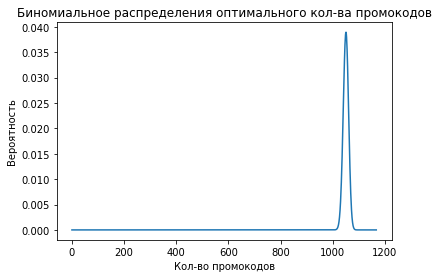

In [54]:
n = 1167 # количество попыток
p = 0.9 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.plot(range(0, n + 1), distr)
plt.title('Биномиальное распределения оптимального кол-ва промокодов')
plt.xlabel('Кол-во промокодов')
plt.ylabel('Вероятность')


В итоге получаем, нужно разослать минимум 1167 промокодов,чтобы вероятность не выполнить план равнялась примерно 5%.

### 7.2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 11 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

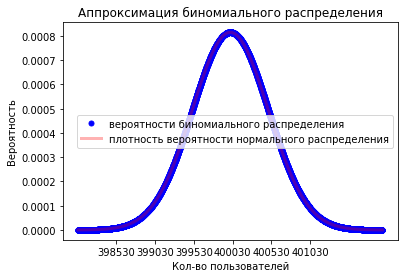

Условие выполняется


In [55]:
#зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()

# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5,
	      label='вероятности биномиального распределения')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 500))
ax.set_xticks(x_ticks)

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.title('Аппроксимация биномиального распределения')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Вероятность')
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

In [56]:
#Определим вероятность, что уведомления откроют не более 399.5 тыс. пользователей.
print('Вероятность, что уведомления откроют не более 399.5 тыс. пользователей:', (st.norm(mu, sigma).cdf(399500)*100).round(1), 'процентов')

Вероятность, что уведомления откроют не более 399.5 тыс. пользователей: 15.4 процентов


## Вывод

1) Загрузили данные о пользовтелях и их поездках .

2) Провели предобработку данных, пропуски не выявлены, удалены дубликаты.

3) Исследоветельский анализ показал:
- Аномальных значений не выявлено, серьёзных выбросов не обнаружено
- В Пятигорске больше всех пользуются услугами аренды самоката, в Москве меньше всех;
- 54.43% пользователей без подписки, 45.57% пользователей с подпиской;
- Чаще всего встречаются пользователи возрастом 25 лет
- В основном проезжают расстояния в пределах 3100 - 3200 метров
- Время 1 поездки в основном 14 - 21 минут

4) Объединили все данные о пользвателях и поездках в одну таблицу
5) Рассчитали помесячную выручку от каждого пользователя:
- Чаще всего за 2021 год пользователь суммарно отдавал примерно 2500 - 2900 рублей.
- Наибольшая выручка вышла в Январе

6) Проверили гипотезы и получили выводы:
- Пользватели с подпсиской тратят больше времени на поездки
- Пользователи с платной подпиской преодолевают оптимальные расстояния для самоката.
- Помесячная выручка от пользователей с подпиской больше
- Чтобы проверить гипотезы о равенстве средней генеральной совокупности для зависимых выборок, применяем метод scipy.stats.ttest_rel().

7) Построилили распределения и получили следующие:
- Нужно разослать минимум 1167 промокодов,чтобы вероятность не выполнить план равнялась примерно 5%.
- Вероятность, что уведомления откроют не более 399.5 тыс. пользователей: 15.4 процентов